<a href="https://colab.research.google.com/github/leeeugene620/PomodoroRPG/blob/main/Final_Project_CS4641_Jaegook_Ishan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Decision Tree Models

Group Members:


*   Ishan Patel, ipatel43
*   Alex Jaegook Kim, jkim3415



# Introduction

  Heart disease remains as the leading cause of death in the United States (Centers for Disease Control and Prevention, 2022). With hundreds of thousands of Americans dying from the disease annually, it is shocking how little the public knows about heart issues and the various health factors that influence their occurrence. A 2019 study published by the International Journal of Environmental Research and Public Health analyzes over 200,000 individuals’ knowledge of the factors that influence heart attacks; results indicated that almost 20% of respondents had what was deemed a low “cardiovascular disease knowledge score,” with males having lower scores than females and other factors such as “older age” and “lack of regular exercise” further contributing to a lower score (Han et. al, 2019). Acknowledging this, our team set out to create different types of machine learning models to most accurately predict heart attack occurrences. This project predicts the likelihood of suffering from a heart attack based on a set of 13 health factors and an output variable. We implemented three training models to analyze these health factors: a decision tree model with all 13 features, a decision tree model with the 5 highest correlated features, and a decision tree model with 2 highly predictive features.
Altogether, this project aims to draw light to how accurately certain health factors can predict a heart attack given the correct learning model.

# Modeling

First, all necessary modules are imported.

In [ ]:
#Imports
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support as precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
import time
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data.

In [ ]:
#Code reading and loading data
heart_attack_data = pd.read_csv("heart.csv")
heart_attack_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Correlations between features are visualized.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


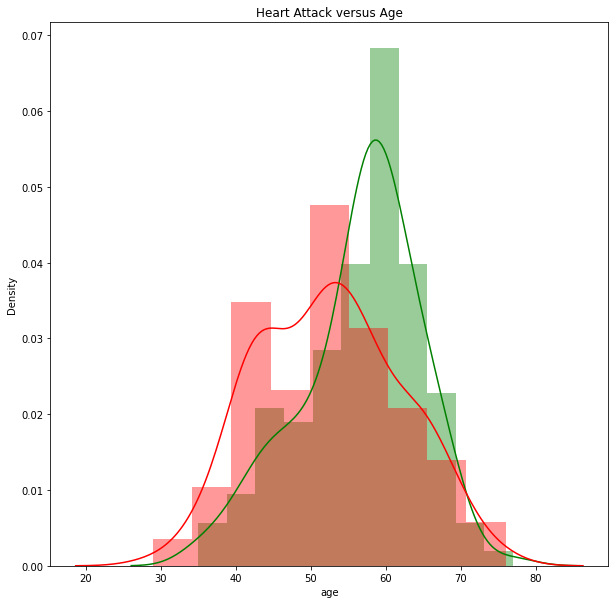

In [ ]:
#Visualization of age vs heart attack
plt.figure(figsize=(10,10))
sns.distplot(heart_attack_data[heart_attack_data['output'] == 0]["age"], color='green',kde=True) 
sns.distplot(heart_attack_data[heart_attack_data['output'] == 1]["age"], color='red',kde=True)
plt.title('Heart Attack versus Age')
plt.show()

Individuals between 40 and 55 years of age experience abnormally high rates of heart attacks relative to their representation in our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


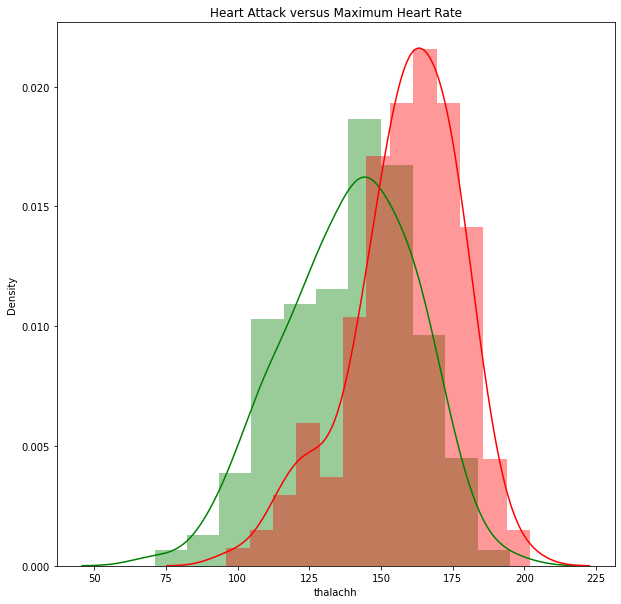

In [ ]:
#Visualization of maximum heart rate vs heart attack
plt.figure(figsize=(10,10))
sns.distplot(heart_attack_data[heart_attack_data['output'] == 0]["thalachh"], color='green',kde=True,) 
sns.distplot(heart_attack_data[heart_attack_data['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Heart Attack versus Maximum Heart Rate')
plt.show()

Individuals with maximum heart rates above 150 beats per minute experience high rates of heart attacks relative to their representation in our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


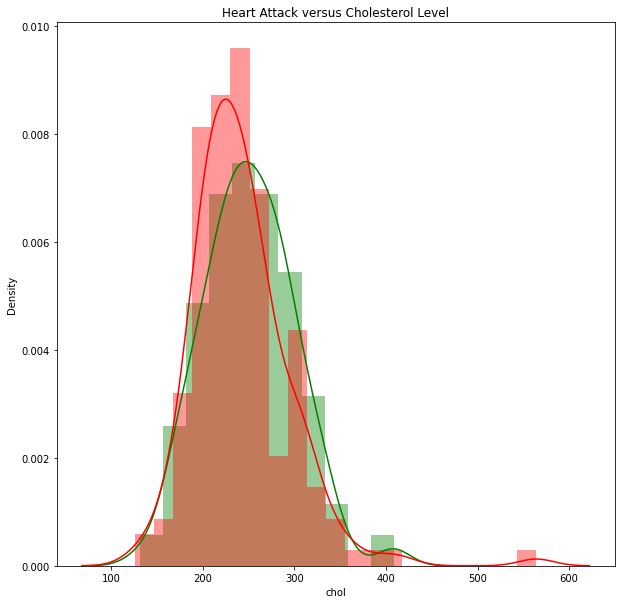

In [ ]:
#Visualization of cholesterol vs heart attack
plt.figure(figsize=(10,10))
sns.distplot(heart_attack_data[heart_attack_data['output'] == 0]["chol"], color='green',kde=True,) 
sns.distplot(heart_attack_data[heart_attack_data['output'] == 1]["chol"], color='red',kde=True)
plt.title('Heart Attack versus Cholesterol Level')
plt.show()

Cholesterol level seems to have little impact on rates of heart attacks among the individuals in our dataset; cholesterol level and heart attack occurrences both follow a bell-shaped curve. 

Model 1: Decision Tree with all 13 Features

In [ ]:
#Code spliting and normalizing the dataset
X = heart_attack_data.iloc[:,:13]
Y = heart_attack_data["output"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=102) 

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [ ]:
#Code training model
start = time.time()

model_tree = DecisionTreeClassifier(random_state=10,criterion="entropy")
model_tree.fit(X_train,Y_train)
Y_pred = model_tree.predict(X_test)

finish = time.time()

model_time = round((finish - start), 5)

print("Execution time:", model_time, "seconds")

#Code displaying the calculations
accuracy = accuracy_score(Y_test,Y_pred)
mean_square_error = 1 - accuracy
precision, recall, fscore, train_support = precision_score(Y_test, Y_pred, pos_label=1, average='binary')

print("Accuracy: " + str(round((accuracy*100),5)) +"%")
print("Mean Square Error: " + str(round((mean_square_error),5)))
print("Precision: " + str(round(precision, 5)))
print("Recall: " + str(round(recall, 5)))
print("F-Score: " + str(round(fscore,5)))


Execution time: 0.00397 seconds
Accuracy: 88.52459%
Mean Square Error: 0.11475
Precision: 0.88889
Recall: 0.91429
F-Score: 0.90141


A decision tree model with all 13 features is defined and trained.

Correlations are displayed for all 13 features present in the dataset.

In [ ]:
#Seeing the correlations between the data points and output
correlation = heart_attack_data.corr()
correlation = correlation.iloc[-1, :-1]
correlation

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
Name: output, dtype: float64

It is observed that the 5 highest correlated features are exng (exercise induced angina), cp (chest pain type), oldpeak (previous peak), thalach (maximum heart rate achieved), and caa (number of major blood vessels).

The five highest correlated features are displayed.

In [ ]:
#Creating a table with just the top five features
five_features = heart_attack_data[['exng', 'cp','oldpeak','thalachh','caa', 'output']].copy()
five_features

,exng,cp,oldpeak,thalachh,caa,output
0,0,3,2.3,150,0,1
1,0,2,3.5,187,0,1
2,0,1,1.4,172,0,1
3,0,1,0.8,178,0,1
4,1,0,0.6,163,0,1
...,...,...,...,...,...,...
298,1,0,0.2,123,0,0
299,0,3,1.2,132,0,0
300,0,0,3.4,141,2,0
301,1,0,1.2,115,1,0


Model 2: Decision Tree with 5 Highest Correlated Features

In [ ]:
#Code spliting and normalizing the dataset
X_2 = five_features.iloc[:,:5]
Y_2 = five_features["output"]

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=102) 

X_train_2 = MinMaxScaler().fit_transform(X_train_2)
X_test_2 = MinMaxScaler().fit_transform(X_test_2)



#Code training model
start_2 = time.time()

model_tree_2 = DecisionTreeClassifier(random_state=10,criterion="entropy")
model_tree_2.fit(X_train_2,Y_train_2)
Y_pred_2 = model_tree_2.predict(X_test_2)

finish_2 = time.time()

model_time = round((finish_2 - start_2), 5)

print("Execution time:", model_time, "seconds")

#Code displaying the calculations
accuracy = accuracy_score(Y_test_2,Y_pred_2)
mean_square_error = 1 - accuracy
precision_2, recall_2, fscore_2, train_support = precision_score(Y_test_2, Y_pred_2, pos_label=1, average='binary')

print("Accuracy: " + str(round((accuracy*100),5)) +"%")
print("Mean Square Error: " + str(round((mean_square_error),5)))
print("Precision: " + str(round(precision, 5)))
print("Recall: " + str(round(recall, 5)))
print("F-Score: " + str(round(fscore,5)))

Execution time: 0.00132 seconds
Accuracy: 85.2459%
Mean Square Error: 0.14754
Precision: 0.88889
Recall: 0.91429
F-Score: 0.90141


A decision tree model with the 5 highest correlated features is defined and trained.

Age and chest pain, two highly predictive features, are displayed.


In [ ]:
#Creating a table with just the two features sex and chest pain
two_features = heart_attack_data[['sex','cp','output']].copy()
two_features

,sex,cp,output
0,1,3,1
1,1,2,1
2,0,1,1
3,1,1,1
4,0,0,1
...,...,...,...
298,0,0,0
299,1,3,0
300,1,0,0
301,1,0,0


Model 3: Decision Tree with Sex and Chest Pain Features

In [ ]:
#Code spliting and normalizing the dataset
X_3 = two_features.iloc[:,:2]
Y_3 = two_features["output"]

X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size=0.2, random_state=102) 

X_train_3 = MinMaxScaler().fit_transform(X_train_3)
X_test_3 = MinMaxScaler().fit_transform(X_test_3)

#Code training model
start_3 = time.time()

model_tree_3 = DecisionTreeClassifier(random_state=10,criterion="entropy")
model_tree_3.fit(X_train_3,Y_train_3)
Y_pred_3 = model_tree_3.predict(X_test_3)

finish_3 = time.time()

model_time = round((finish_3 - start_3), 5)

print("Execution time:", model_time, "seconds")

#Code displaying the calculations
accuracy = accuracy_score(Y_test_3,Y_pred_3)
mean_square_error = 1 - accuracy
precision, recall, fscore, train_support = precision_score(Y_test_3, Y_pred_3, pos_label=1, average='binary')

print("Accuracy: " + str(round((accuracy*100),5)) +"%")
print("Mean Square Error: " + str(round((mean_square_error),5)))
print("Precision: " + str(round(precision, 5)))
print("Recall: " + str(round(recall, 5)))
print("F-Score: " + str(round(fscore,5)))

Execution time: 0.00138 seconds
Accuracy: 80.32787%
Mean Square Error: 0.19672
Precision: 0.87097
Recall: 0.77143
F-Score: 0.81818


A decision tree model consisting of just the sex and chest pain features results in an abnormally high accuracy.

# Data Visualization

ROC curves for each model are created and displayed. AUC values are also calculated.

Model 1 ROC Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


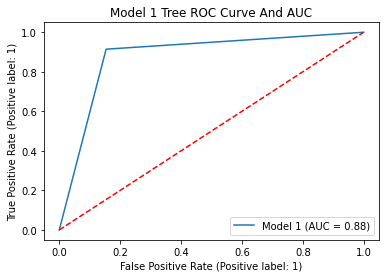

In [ ]:
#Displaying the curve
plot_roc_curve(model_tree, X_test, Y_test, name = "Model 1")
plt.title("Model 1 Tree ROC Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

Model 2 ROC Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


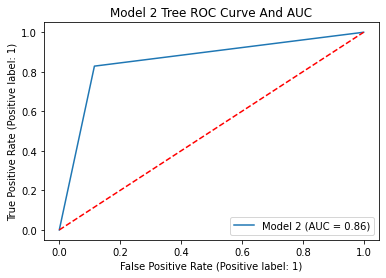

In [ ]:
#Displaying the curve
plot_roc_curve(model_tree_2, X_test_2, Y_test_2, name = "Model 2")
plt.title("Model 2 Tree ROC Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


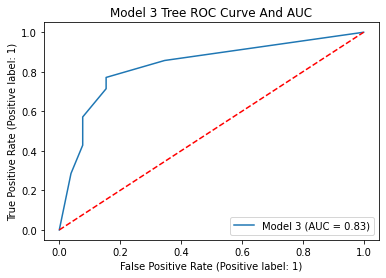

In [ ]:
#Displaying the curve
plot_roc_curve(model_tree_3, X_test_3, Y_test_3, name = "Model 3")
plt.title("Model 3 Tree ROC Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

# References

Centers for Disease Control and Prevention. (2022, January 13). FastStats- Deaths and Mortality. Centers for Disease Control and Prevention. Retrieved July 17, 2022, from https://www.cdc.gov/nchs/fastats/deaths.htm#:~:text=Number%20of%20deaths%20for%20leading,Accidents%20(unintentional%20injuries)%3A%20200%2C955 


Han, C. H., Kim, H., Lee, S., & Chung, J. H. (2019). Knowledge and Poor Understanding Factors of Stroke and Heart Attack Symptoms. International Journal of Environmental Research and Public Health, 16(19). https://doi.org/10.3390/ijerph16193665 
